# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/bharatsingh/Downloads/Classwork5/fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/5c/3157mbn910b2gp0sphv4k8xm0000gn/T/ipykernel_71048/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/5c/3157mbn910b2gp0sphv4k8xm0000gn/T/ipykernel_71048/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
# X_train

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_holdout = pd.DataFrame(scaler.transform(X_holdout),columns=X_holdout.columns)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [11]:
!pip install --upgrade scikit-learn==1.2.2
!pip install imblearn

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [13]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

# 3.) Train three logistic regression models

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

# 4.) Test the three models

In [16]:
over_log.score(X_test, y_test)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

0.9196957700520646

In [17]:
under_log.score(X_test, y_test)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

0.9069555411598167

In [18]:
smote_log.score(X_test, y_test)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

0.9149451762278366

# 5.) Which performed best in Out of Sample metrics?

In [20]:
# Sensitivity here in credit fraud is more important as seen from last class

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_true = y_test

In [23]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

array([[76444,  6616],
       [   78,   220]])

In [24]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.738255033557047


In [25]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

array([[75382,  7678],
       [   78,   220]])

In [26]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.738255033557047


In [27]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

array([[76048,  7012],
       [   78,   220]])

In [28]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.738255033557047


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [29]:
X_train

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.383856,-0.203535,-0.028274,-0.279414,-0.276058,-0.335489,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,-0.257974,-0.275961,-0.285484,3.188274,-0.180204
1,-0.050098,4.314722,1.358017,-0.279414,-0.276058,-0.335489,5.238722,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,-0.257974,-0.275961,-0.285484,-0.313649,-0.180204
2,-0.378761,-0.282672,0.145012,-0.279414,-0.276058,-0.335489,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,3.876359,-0.275961,-0.285484,-0.313649,-0.180204
3,-0.237132,-0.282459,1.415780,3.578915,-0.276058,-0.335489,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,-0.257974,-0.275961,-0.285484,-0.313649,-0.180204
4,0.042368,-0.228908,-0.779182,-0.279414,-0.276058,2.980724,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,-0.257974,-0.275961,-0.285484,-0.313649,-0.180204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388998,-0.435374,-0.199341,0.895920,-0.279414,-0.276058,-0.335489,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,4.407068,-0.257974,-0.275961,-0.285484,-0.313649,-0.180204
388999,-0.035006,2.512136,-1.067993,-0.279414,-0.276058,-0.335489,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,-0.257974,3.623696,-0.285484,-0.313649,-0.180204
389000,-0.114863,-0.271665,-0.836944,-0.279414,-0.276058,2.980724,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,-0.257974,-0.275961,-0.285484,-0.313649,-0.180204
389001,-0.016856,-0.292799,-1.530090,-0.279414,-0.276058,2.980724,-0.190886,-0.322314,-0.265265,-0.323319,-0.309563,-0.226908,-0.257974,-0.275961,-0.285484,-0.313649,-0.180204


In [30]:
raw_temp = pd.concat([X_train, y_train], axis =1)

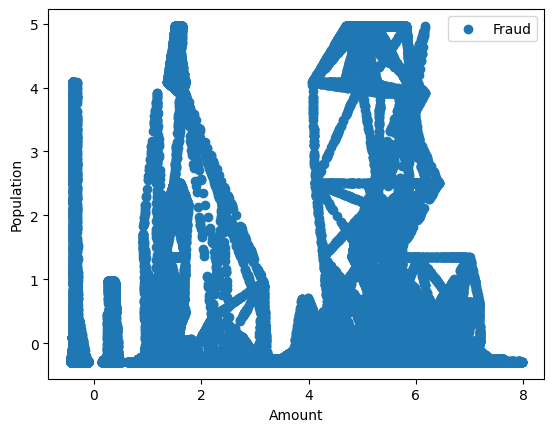

In [46]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [47]:
raw_temp = pd.concat([smote_X, smote_y], axis =1)

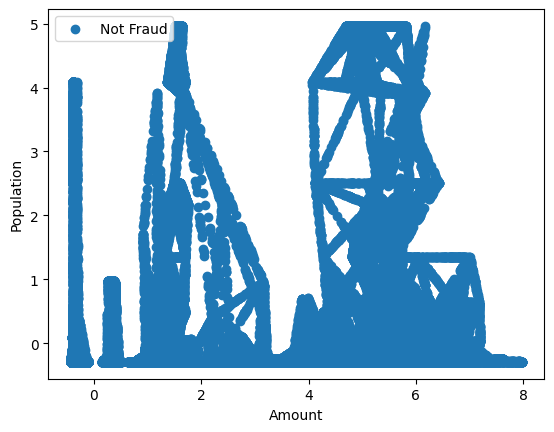

In [48]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 

In [80]:
resampling_methods={
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE(),   
}

model_configs={
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty="l1",C=2.,solver="liblinear"),
    "DTREE" : DecisionTreeClassifier()
}

In [81]:
trained_models={}

In [87]:
def calc_perf_metric(y_true, y_pred):
    tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity=tp/(tp+fn)
    specificity=tn/(tn+fp)
    precision= precision_score(y_true, y_pred)
    recall=recall_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)
    
    return(sensitivity,specificity, precision, recall, f1)

In [88]:
trained_models={}
results=[]

In [89]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y=resampler.fit_resample(X_train,y_train)
    
    for model_key, model in model_configs.items():
        combined_key=f"{resample_key}_{model_key}"
        
        m=model.fit(resample_X,resample_y)
        
        trained_models[combined_key]=m
        y_pred=m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1= calc_perf_metric(y_true, y_pred)
        
        results.append({"Model":combined_key,
                       "Sensitivity": sensitivity,
                       "Specificity": specificity,
                       "Precision": precision,
                       "Recall": recall,
                       "F1":f1})

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [90]:
results_df=pd.DataFrame(results)

In [91]:
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.738255,0.915230,0.030299,0.738255,0.058209
1,over_LASSO,0.738255,0.915266,0.030311,0.738255,0.058232
2,over_DTREE,0.563758,0.998218,0.531646,0.563758,0.547231
3,under_LOG,0.738255,0.911871,0.029178,0.738255,0.056137
4,under_LASSO,0.738255,0.910944,0.028883,0.738255,0.055591
5,under_DTREE,0.959732,0.944811,0.058727,0.959732,0.110681
6,smote_LOG,0.738255,0.915603,0.030429,0.738255,0.058448
7,smote_LASSO,0.738255,0.915627,0.030437,0.738255,0.058464
8,smote_DTREE,0.704698,0.992788,0.259580,0.704698,0.379404


### Random Over-sampling (over):

#### LOG (Logistic Regression):
            
- Sensitivity (True Positive Rate): 73.83% indicates the model's ability to correctly identify fraudulent transactions out of all actual fraudulent cases. It's crucial for fraud detection systems to have high sensitivity to minimize false negatives.
- Specificity (True Negative Rate): 91.52% shows the model's proficiency in identifying non-fraudulent transactions among all actual non-fraudulent cases. Although it's high, a balance between sensitivity and specificity is desirable.
- Precision: 3.03% indicates the proportion of correctly identified fraudulent transactions out of all predicted as fraudulent. The low precision suggests a high number of false positives, which could lead to unnecessary investigations.
- Recall: 73.83% is consistent with sensitivity and indicates the model's ability to capture most fraudulent cases.
- F1 Score: 5.82% balances precision and recall. A higher F1 score suggests better overall model performance.

### Random Under-sampling (under):

- LOG : The performance metrics are similar to random over-sampling, as both methods yield comparable results. However, under-sampling might lead to information loss due to the reduction in the majority class instances.
        
- DTREE : The decision tree model shows significantly higher sensitivity, suggesting its effectiveness in capturing fraudulent cases. However, the low precision indicates a trade-off, potentially leading to a higher false positive rate.

### SMOTE :
       
- LOG: Performance is comparable to random over-sampling, implying that SMOTE effectively generates synthetic samples to balance the class distribution.
- DTREE: The decision tree model with SMOTE shows a balanced performance with moderate sensitivity, specificity, precision, recall, and F1 score. This suggests that SMOTE mitigates the class imbalance issue effectively while maintaining model performance.



In [72]:
trained_models

{'over_LOG': LogisticRegression(),
 'over_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'over_DTREE': DecisionTreeClassifier(),
 'under_LOG': LogisticRegression(),
 'under_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'under_DTREE': DecisionTreeClassifier(),
 'smote_LOG': LogisticRegression(),
 'smote_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'smote_DTREE': DecisionTreeClassifier()}